In [1]:
!mkdir arc
!cd arc

In [2]:
!python -m venv arc

Error: Command '['/content/arc/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.


In [3]:
"arc/Scripts/activate.bat"

'arc/Scripts/activate.bat'

In [4]:
!pip install absl-py
!pip install asttokens
!pip install astunparse
!pip install backcall
!pip install cachetools
!pip install certifi
!pip install charset-normalizer
!pip install click
!pip install colorama
!pip install cycler
!pip install debugpy
!pip install decorator
!pip install entrypoints
!pip install executing
!pip install flatbuffers
!pip install fonttools
!pip install gast
!pip install google-auth
!pip install google-auth-oauthlib
!pip install google-pasta
!pip install grpcio
!pip install h5py
!pip install idna
!pip install imbalanced-learn
!pip install imblearn
!pip install importlib-metadata
!pip install ipykernel
!pip install ipython
!pip install jedi
!pip install joblib
!pip install jupyter-client
!pip install jupyter-core
!pip install keras
!pip install Keras-Applications
!pip install Keras-Preprocessing
!pip install kiwisolver
!pip install libclang
!pip install Markdown
!pip install matplotlib
!pip install matplotlib-inline
!pip install nest-asyncio
!pip install nltk
!pip install numpy
!pip install oauthlib
!pip install opt-einsum
!pip install packaging
!pip install pandas
!pip install parso
!pip install pickleshare
!pip install Pillow
!pip install prompt-toolkit
!pip install protobuf
!pip install psutil
!pip install pure-eval
!pip install PyArabic
!pip install pyasn1
!pip install pyasn1-modules
!pip install Pygments
!pip install pyparsing
!pip install python-dateutil
!pip install pytz
!pip install pyzmq
!pip install regex
!pip install requests
!pip install requests-oauthlib
!pip install rsa
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install six
!pip install sklearn
!pip install snowballstemmer
!pip install stack-data
!pip install tensorboard
!pip install tensorboard-data-server
!pip install tensorboard-plugin-wit
!pip install tensorflow
!pip install tensorflow-estimator
!pip install tensorflow-io-gcs-filesystem
!pip install termcolor
!pip install threadpoolctl
!pip install tornado
!pip install tqdm
!pip install traitlets
!pip install typing-extensions
!pip install urllib3
!pip install wcwidth
!pip install Werkzeug
!pip install wrapt
!pip install zipp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [46]:
import pandas as pd
tweets = pd.read_csv('tweets.csv',encoding = "utf-8")
tweets.head()

,tweet,topic,Unnamed: 2,Unnamed: 3
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports,NaN,NaN
1,RT @Alhilal_FC: ⏰ بداية الشوط الثاني\n#الهلال ...,Sports,NaN,NaN
2,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports,NaN,NaN
3,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business,NaN,NaN
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology,NaN,NaN


In [47]:
print('Data size:', tweets.shape)

Data size: (25334, 4)


In [48]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
def remove_chars(text, del_chars):
    translator = str.maketrans('', '', del_chars)
    return text.translate(translator)
def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)
def clean_tweet(tweet):
    stop_words = stopwords.words('arabic')
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U00002500-\U00002BEF"
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"
            u"\u3030"
                        "]+", re.UNICODE)
    tweet = str(tweet)
    tweet = re.sub("@[^\s]+","",tweet)
    tweet = re.sub("RT","",tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet =  re.sub(emoj, '', tweet)
    tweet = ' '.join(word for word in tweet.split() if word not in
stop_words)
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = re.sub(r'[0-9]+', '', tweet)
    arabic_punctuations = '''`÷× ',.":/][%^&*()_<> ؟ ،ـ ؛ {}–“…”!|+¦~ ـ '''
    english_punctuations = string.punctuation
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
    tweet = remove_repeating_char(tweet)
    tweet = tweet.replace('\n', ' ')
    tweet = tweet.strip(' ')
    return tweet
def tokenizingText(text):
    tokens_list = word_tokenize(text)
    return tokens_list
def filteringText(tokens_list):
    listStopwords = set(stopwords.words('arabic'))
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    tokens_list = filtered
    return tokens_list
def stemmingText(tokens_list):
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list

def toSentence(words_list):
    sentence = ' '.join(word for word in words_list)
    return sentence

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-933407381.py:36: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub("@[^\s]+","",tweet)


In [49]:
import string
import re
import nltk
from nltk.corpus import stopwords
from snowballstemmer import stemmer

# تنزيل مكتبات NLTK
nltk.download('stopwords')

ar_stemmer = stemmer("arabic")

def remove_chars(text, del_chars):
    translator = str.maketrans('', '', del_chars)
    return text.translate(translator)

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):
    tweet = str(tweet)

    # إزالة mentions وRT وروابط
    tweet = re.sub(r"RT\s?", "", tweet)  # إزالة RT
    tweet = re.sub(r"@[^\s]+", "", tweet)  # إزالة mentions
    tweet = re.sub(r"(?:http[s]?://|www\.)\S+", "", tweet)  # إزالة الروابط

    # استبدال # و _ بمسافة
    tweet = tweet.replace("#", " ").replace("_", " ")

    # إزالة الأرقام
    tweet = re.sub(r'\d+', '', tweet)

    # إزالة علامات الترقيم العربية والإنجليزية
    arabic_punctuations = '''`÷× ؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    tweet = remove_chars(tweet, arabic_punctuations + string.punctuation)

    # إزالة تكرار الحروف
    tweet = remove_repeating_char(tweet)

    # إزالة الأسطر الزائدة
    tweet = tweet.replace('\n', ' ').strip()

    # لا نحذف stopwords هنا، سيتم حذفها بعد Tokenization
    return tweet


# تعديل Tokenizer ليعمل بدون punkt
def tokenizingText(text):
    return text.split()  # تقسيم على الفراغات فقط

def filteringText(tokens_list):
    stop_words = set(stopwords.words('arabic'))
    return [word for word in tokens_list if word not in stop_words]

def stemmingText(tokens_list):
    return [ar_stemmer.stemWord(word) for word in tokens_list]

# تجربة
text= "   🌝     موي لك ، ةقيدحلا ىلإ باهذلا بحأ انأ 9    ءالؤه يقافر عم ، ً احابص ! @toto  "
print("Original Tweet:\n", text, "\n")

text = clean_tweet(text)
print("Cleaned Tweet:\n", text, "\n")

tokens_list = tokenizingText(text)
print("Tokens:\n", tokens_list, "\n")

tokens_list = filteringText(tokens_list)
print("Filtered Tokens:\n", tokens_list, "\n")

tokens_list = stemmingText(tokens_list)
print("Stemmed Tokens:\n", tokens_list)


Original Tweet:
    🌝     موي لك ، ةقيدحلا ىلإ باهذلا بحأ انأ 9    ءالؤه يقافر عم ، ً احابص ! @toto   

Cleaned Tweet:
 🌝مويلكةقيدحلاىلإباهذلابحأانأءالؤهيقافرعمًاحابص 

Tokens:
 ['🌝مويلكةقيدحلاىلإباهذلابحأانأءالؤهيقافرعمًاحابص'] 

Filtered Tokens:
 ['🌝مويلكةقيدحلاىلإباهذلابحأانأءالؤهيقافرعمًاحابص'] 

Stemmed Tokens:
 ['🌝مويلكةقيدحلاىلاباهذلابحااناءالوهيقافرعماحابص']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def process_tweet(tweet):
    tweet=clean_tweet(tweet)
    tweet=tokenizingText(tweet)
    tweet=stemmingText(tweet)
    return tweet
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

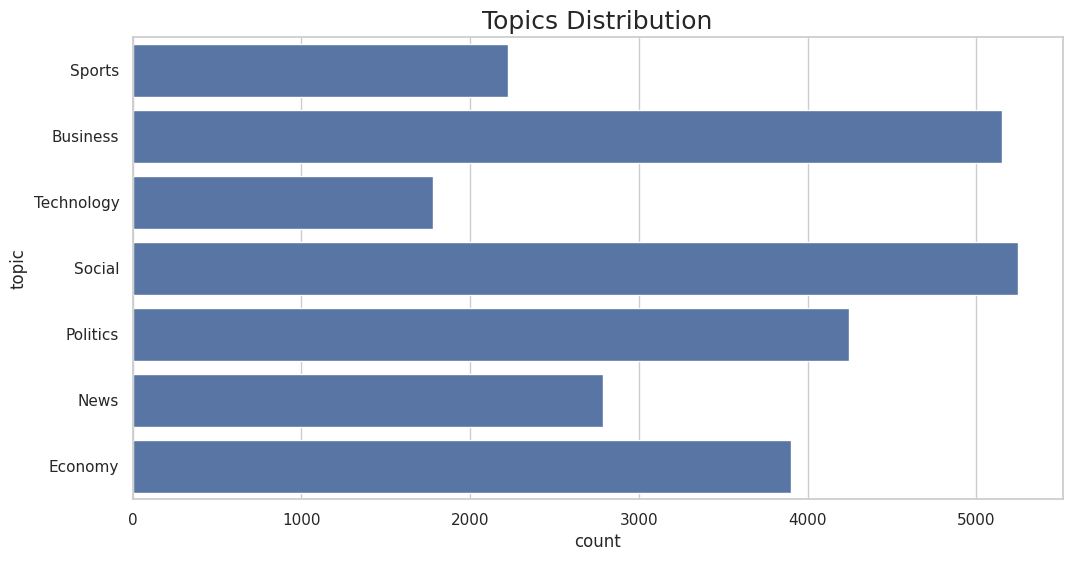

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution', fontsize=18)
plt.show()

In [52]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
tweets = tweets.sample(frac=1)
tweets, Y = oversample.fit_resample(tweets, tweets.topic)

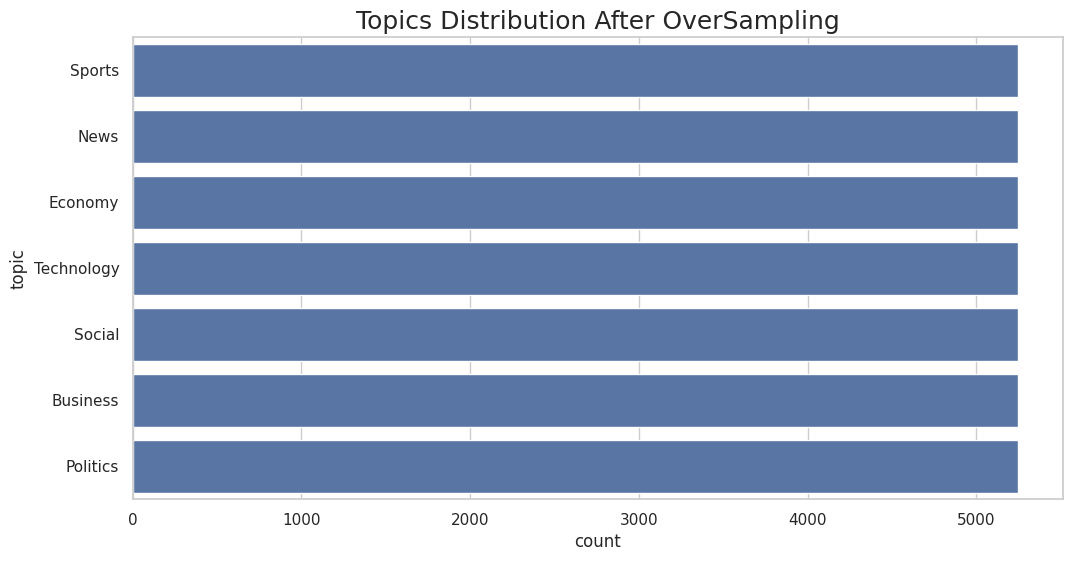

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution After OverSampling', fontsize=18)
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)
classes = le_topics.classes_
n_classes = len(classes)
print("No. of classes:", n_classes)
print("Classes:", classes)
print("Coding: ", le_topics.transform(classes))

No. of classes: 7
Classes: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentences = tweets['tweet'].apply(toSentence)
print(sentences[6])
max_words = 5000
max_len = 50
tokenizer = Tokenizer(num_words=max_words )
tokenizer.fit_on_texts(sentences)
S = tokenizer.texts_to_sequences(sentences)
print(S[0])
X = pad_sequences(S, maxlen=max_len)
print(X[0])
X.shape

لدياستفسارتطبيقصحتيممكنيكونالخاص
[11]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 11]


(36736, 50)

In [56]:
y = tweets['topic']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29388, 50) (29388,)
(7348, 50) (7348,)


In [57]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop
def create_model(embed_dim = 32, hidden_unit = 16, dropout_rate = 0.2,
 optimizers = RMSprop, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim,input_length = MAX_LENGTH))
    model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))
    model.add(Dense(units = len(classes), activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [58]:
# 👇 تعريف القيم الأساسية
max_words = 5000      # نفس اللي استعملته مع Tokenizer
MAX_LENGTH = 50       # نفس القيمة اللي استعملتها مع pad_sequences

# نحسب عدد الأصناف مباشرة من y_train
num_classes = len(set(y_train))

# استدعاء النموذج
model = create_model(
    embed_dim=32,
    hidden_unit=64,
    dropout_rate=0.2,
    optimizers=Adam,
    learning_rate=0.001
)

# تعديل الطبقة الأخيرة داخل النموذج لعدد الأصناف الصحيح
from tensorflow.keras.layers import Dense
model.pop()  # إزالة الطبقة الأخيرة القديمة
model.add(Dense(num_classes, activation='softmax'))  # إضافة طبقة جديدة

# تدريب النموذج
model_prediction = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.2689 - loss: 1.8645 - val_accuracy: 0.5771 - val_loss: 1.1992
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.6361 - loss: 1.0763 - val_accuracy: 0.7254 - val_loss: 0.8893
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7897 - loss: 0.7932 - val_accuracy: 0.7642 - val_loss: 0.7489
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.8152 - loss: 0.6318 - val_accuracy: 0.7785 - val_loss: 0.6597
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.8132 - loss: 0.5488 - val_accuracy: 0.7822 - val_loss: 0.6126
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.8245 - loss: 0.5060 - val_accuracy: 0.7839 - val_loss: 0.5851
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.8461 - loss: 0.4468 - val_accuracy: 0.7884 - val_loss: 0.5702
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.8435 - lo

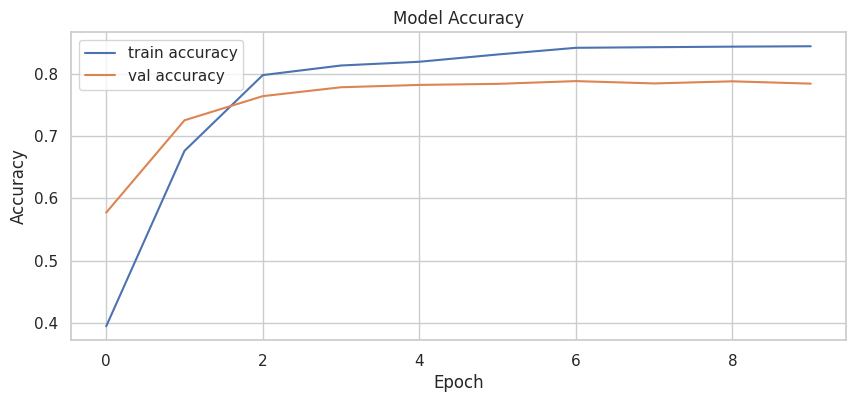

In [59]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# توقع الاحتمالات من النموذج
y_pred_probs = model.predict(X_test)

# تحويل الاحتمالات إلى أصناف
y_pred = np.argmax(y_pred_probs, axis=1)

# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# طباعة النتائج
print('Model Accuracy on Test Data:', accuracy * 100)
print('Model Precision on Test Data:', precision * 100)
print('Model Recall on Test Data:', recall * 100)
print('Model F1 on Test Data:', f1 * 100)

# استدعاء مصفوفة الارتباك مباشرة
print(confusion_matrix(y_test, y_pred))


230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Model Accuracy on Test Data: 78.53837778987479
Model Precision on Test Data: 85.15427154455348
Model Recall on Test Data: 78.53837778987479
Model F1 on Test Data: 79.66960440137
[[974   0   9  83   1   0   0]
 [210 794   2  34   1   1   0]
 [109   2 942  57   3   0   0]
 [640   1   6 381   0   0   0]
 [235   4   8  40 761   1   0]
 [ 32   4  10  22   9 932   0]
 [ 34   3   4  11   1   0 987]]


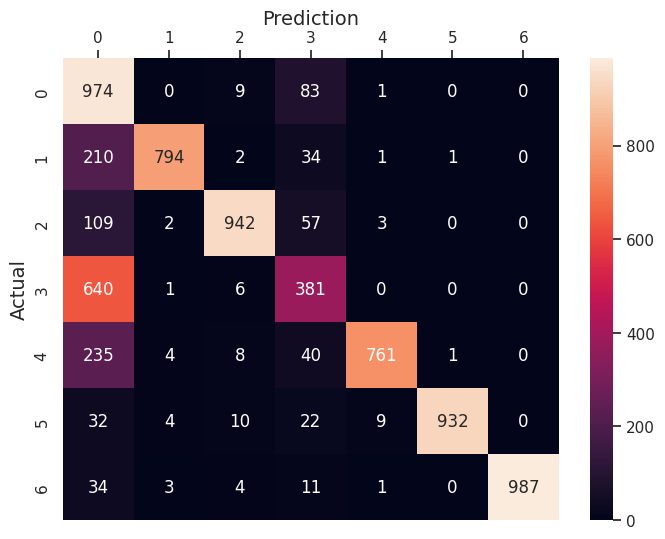

In [61]:
import seaborn as sns
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_ylabel('Actual', fontsize = 14)
plt.show()

In [62]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)
import numpy as np

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# 📌 إما بدون target_names (يعرض بالأرقام)
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

# 📌 أو لو حابب أسماء مخصصة (عددها لازم = 7)
# target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]
# print(classification_report(y_test, y_pred, target_names=target_names))



Accuracy: 0.79

Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

Macro Precision: 0.85
Macro Recall: 0.78
Macro F1-score: 0.80

Weighted Precision: 0.85
Weighted Recall: 0.79
Weighted F1-score: 0.80

Classification Report

              precision    recall  f1-score   support

           0       0.44      0.91      0.59      1067
           1       0.98      0.76      0.86      1042
           2       0.96      0.85      0.90      1113
           3       0.61      0.37      0.46      1028
           4       0.98      0.73      0.83      1049
           5       1.00      0.92      0.96      1009
           6       1.00      0.95      0.97      1040

    accuracy                           0.79      7348
   macro avg       0.85      0.78      0.80      7348
weighted avg       0.85      0.79      0.80      7348



In [63]:
def classify_tweet(tweet):
    tweet = toSentence(tweet)
    ar=[]
    ar.append(tweet)
    seq = tokenizer.texts_to_sequences(ar)
    pseq = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(pseq)
    return pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

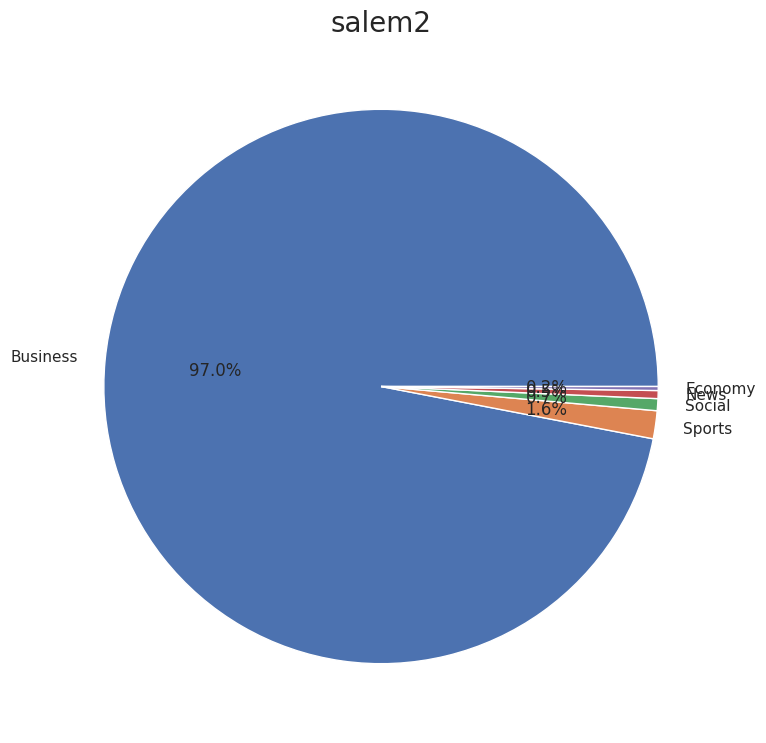

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def classify_person(person_name):
    # قراءة الملف
    path = person_name + '.csv'
    df = pd.read_csv(path)

    # إنشاء عداد لكل فئة
    classes_count = {key: 0 for key in classes}
    total = 0

    # تصنيف كل تغريدة
    for _, row in df.iterrows():
        tweet = row['tweet']
        processed_tweet = process_tweet(tweet)

        # تصنيف التغريدة إذا ليست فارغة
        if len(processed_tweet) > 0:
            c = classify_tweet(processed_tweet)  # مخرجات النموذج

            try:
                # استخدام argmax للحصول على الفئة الأعلى احتمال
                idx_label = c.argmax()
                topic = le_topics.inverse_transform([idx_label])[0]

                classes_count[topic] += 1
                total += 1
            except Exception as e:
                print("خطأ في تصنيف التغريدة:", e)
                continue

    # ترتيب الفئات حسب العدد مع تجاهل الصفر
    sorted_classes = sorted(classes_count, key=classes_count.get, reverse=True)
    sorted_classes_cleaned = {w: classes_count[w] for w in sorted_classes if classes_count[w] > 0}

    # حماية من القسمة على صفر
    n = sum(sorted_classes_cleaned.values()) or 1

    # طباعة النتائج
    print(person_name, "is classified as :")
    for key, value in sorted_classes_cleaned.items():
        print(key, "(", "{:.2f}".format((value / n) * 100), "%)")

    # رسم Pie chart
    x = list(sorted_classes_cleaned.keys())
    y = list(sorted_classes_cleaned.values())
    plt.figure(figsize=(9,9))
    plt.title(person_name, fontdict={'fontsize':20})
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.show()

# مثال على الاستدعاء
classify_person("salem2")
